<h1 style="color: #F10606;" > <center> Compte Rendu TP2: CLUSTERING </center></h1>


# <span style="color:#28B463  "> I. PARTIE THÉORIQUE:


### Clustering (ou partitionnement des données) :

Cette méthode de classification non supervisée rassemble un ensemble d’algorithmes d’apprentissage dont le but est de regrouper entre elles des données non étiquetées présentant des propriétés similaires. Isoler ainsi des schémas ou des familles permet aussi de préparer le terrain pour l’application ultérieure d’algorithmes d’apprentissage supervisé (comme le KNN).
Le clustering est utilisé notamment lorsqu’il est coûteux d’étiqueter le données. C’est néanmoins un problème mal défini mathématiquement : différentes métriques et/ou différentes représentations des données aboutiront à différents regroupements sans qu’aucun ne soit nécessairement meilleur qu’un autre. Ainsi la méthode de clustering doit être choisie avec soin en fonction du résultat attendu et de l’utilisation prévue des données.
Les algorithmes de clustering les plus courants sont le K-Means, les algorithmes de maximisation de l’espérance (de type EM, comme les mixtures gaussiennes) et les partitions de graphes. Voyons comment cela se traduit dans deux exemples :

<img src="image1.png">

 ### Exemple d'algorithme de clustering : K-means (ou K-moyennes)
C’est l’un des algorithmes de clustering les plus répandus. Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters).
La similarité entre deux données peut être inférée grâce à la “distance” séparant leurs descripteurs ; ainsi deux données très similaires sont deux données dont les descripteurs sont très proches. Cette définition permet de formuler le problème de partitionnement des données comme la recherche de K “données prototypes”, autour desquelles peuvent être regroupées les autres données.

<h3>Exemple de segmentation des images avec l'algorithme de clustering K-means </h3>

<h4><center>Original Image</center></h4><img src="image2.png">  <h4><center>Image clustered with k=3</center></h4><img src="k3.png">  <h4><center>Image clustered with k=6</center><img src="k6.png">

# <span style="color:#28B463  "> II. PARTIE PRATIQUE :


<h3>Installation de la bilbliothéque "OPEN-CV"</h3>

In [2]:
#!pip install opencv-python

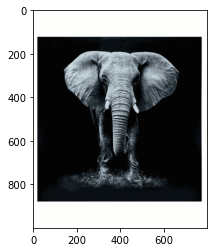

In [28]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io

image = cv2.imread('eleph.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 10)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('eleph2.jpg', quant)
plt.imshow(quant)

cv2.imread('eleph.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="capture.png">

<h3> => On remarque que lorsque le nombre de cluster k = 2 , on trouve l'image noir et blanc, et à chaque fois qu'on augmente le nombre de cluster, l'image segmentée sera plus proche à l'image originale</h3>

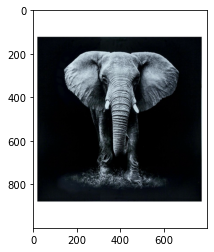

In [10]:
plt.imshow(image)

In [29]:
#!pip install opencv-python

### Quelques type de bruits :

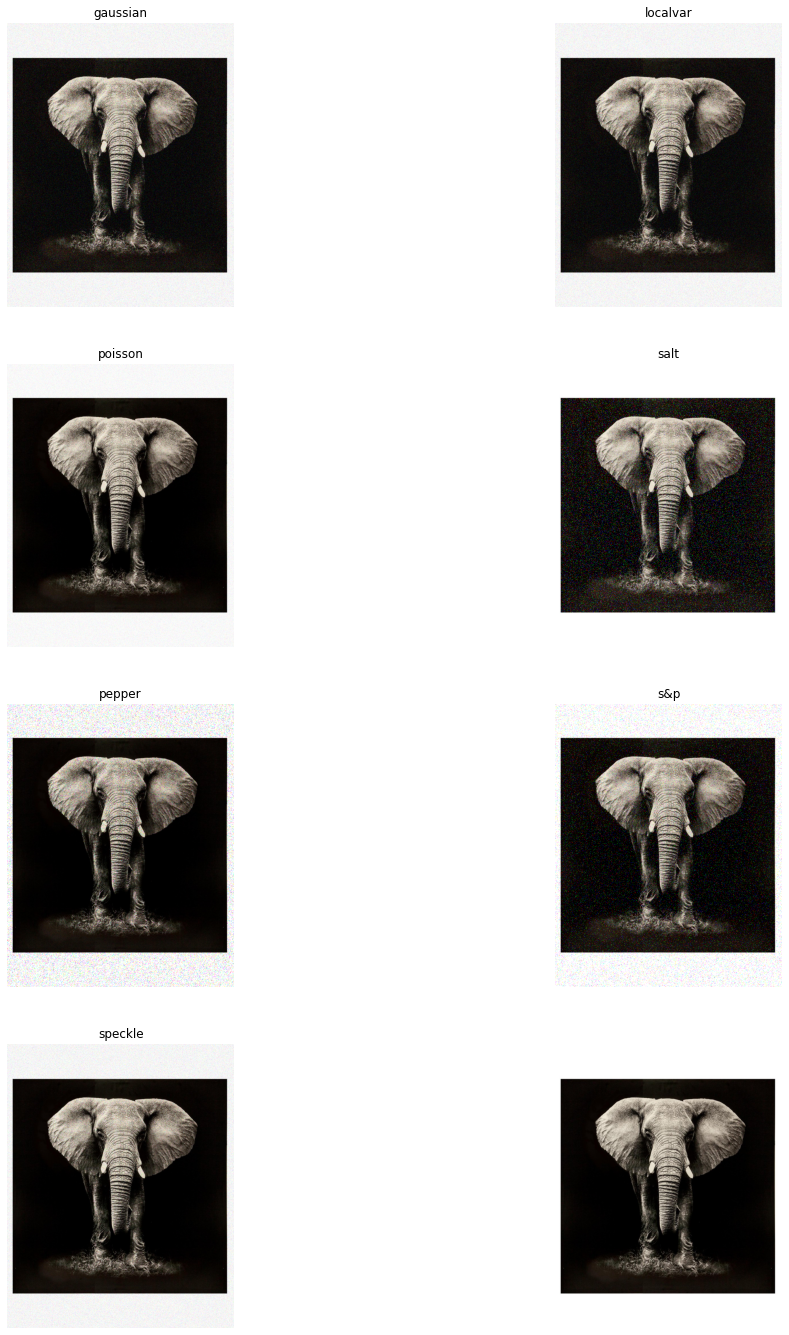

In [30]:
import skimage.io
import matplotlib.pyplot as plt
img_path="eleph.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()
